In [40]:
#Importar librerias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [41]:
#Importartar data set
data=pd.read_csv('vistara.csv')

In [42]:
data=data.drop(['Unnamed: 11'], axis=1)


In [43]:
data['dolares'] = data['price'] * 0.12

In [44]:
data.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,dolares
0,Vistara,UK-893,Bangalore,Evening,zero,Night,Hyderabad,Economy,1.00,16,1714,205.68
1,Vistara,UK-893,Bangalore,Evening,zero,Night,Hyderabad,Economy,1.00,17,1714,205.68
2,Vistara,UK-897,Bangalore,Early_Morning,zero,Morning,Hyderabad,Economy,1.17,17,1714,205.68


In [45]:
#Información
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127859 entries, 0 to 127858
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           127859 non-null  object 
 1   flight            127859 non-null  object 
 2   source_city       127859 non-null  object 
 3   departure_time    127859 non-null  object 
 4   stops             127859 non-null  object 
 5   arrival_time      127859 non-null  object 
 6   destination_city  127859 non-null  object 
 7   class             127859 non-null  object 
 8   duration          127859 non-null  float64
 9   days_left         127859 non-null  int64  
 10  price             127859 non-null  int64  
 11  dolares           127859 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 11.7+ MB


In [46]:
# columnas y filas
data.shape


(127859, 12)

In [47]:
#Variables dataset
data.describe()


,duration,days_left,price,dolares
count,127859.000000,127859.000000,127859.000000,127859.000000
mean,13.326634,25.894532,30396.536302,3647.584356
std,6.777230,13.638537,25637.159445,3076.459133
min,1.000000,1.000000,1714.000000,205.680000
25%,8.500000,14.000000,6412.000000,769.440000
50%,12.500000,26.000000,15543.000000,1865.160000
75%,17.000000,38.000000,55377.000000,6645.240000
max,47.080000,49.000000,123071.000000,14768.520000


In [48]:
#Buscar null
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dolares             0
dtype: int64

In [49]:
#Valor unico de cada variable
data.nunique()


airline                1
flight               133
source_city            6
departure_time         5
stops                  3
arrival_time           6
destination_city       6
class                  2
duration             392
days_left             49
price               5303
dolares             5303
dtype: int64

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

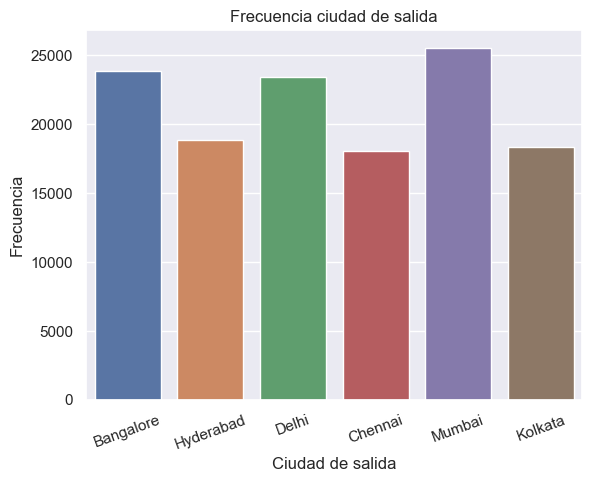

In [51]:
sns.countplot(data=data, x='source_city')
plt.xlabel('Ciudad de salida')
plt.ylabel('Frecuencia')
plt.title('Frecuencia ciudad de salida')
plt.xticks(rotation=20)
plt.show()

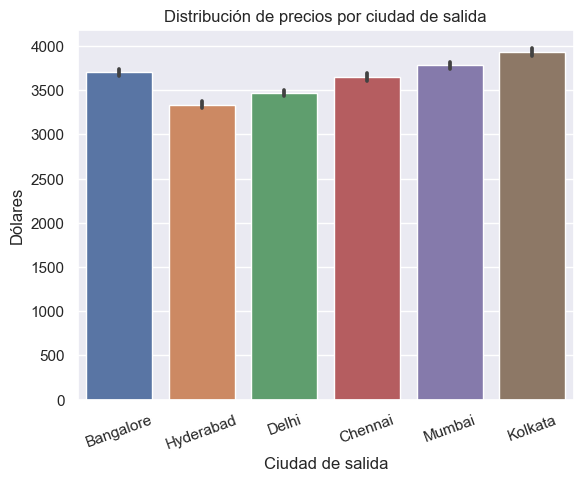

In [52]:
sns.barplot(data=data, x='source_city', y='dolares')
plt.xlabel('Ciudad de salida')
plt.ylabel('Dólares')
plt.title('Distribución de precios por ciudad de salida')
plt.xticks(rotation=20)
plt.show()



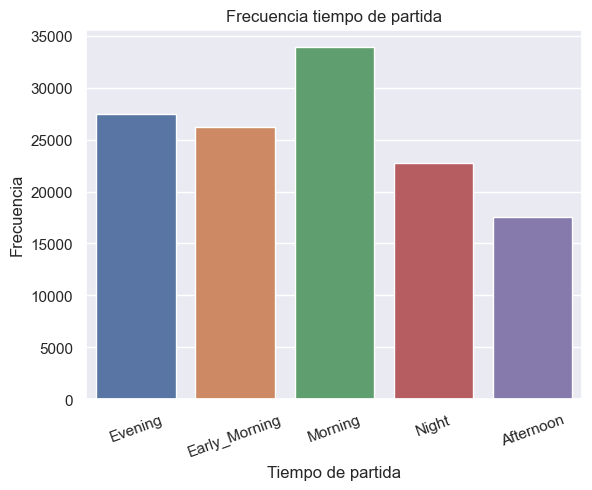

In [53]:
sns.countplot(data=data, x='departure_time')
plt.xlabel('Tiempo de partida')
plt.ylabel('Frecuencia')
plt.title('Frecuencia tiempo de partida')
plt.xticks(rotation=20)
plt.show()

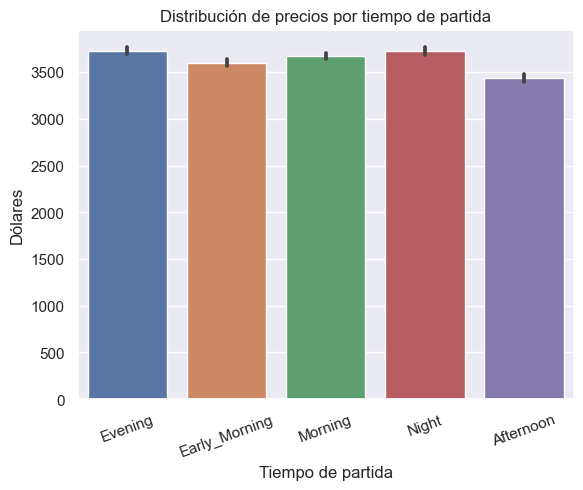

In [54]:
sns.barplot(data=data, x='departure_time', y='dolares')
plt.xlabel('Tiempo de partida')
plt.ylabel('Dólares')
plt.title('Distribución de precios por tiempo de partida')
plt.xticks(rotation=20)
plt.show()

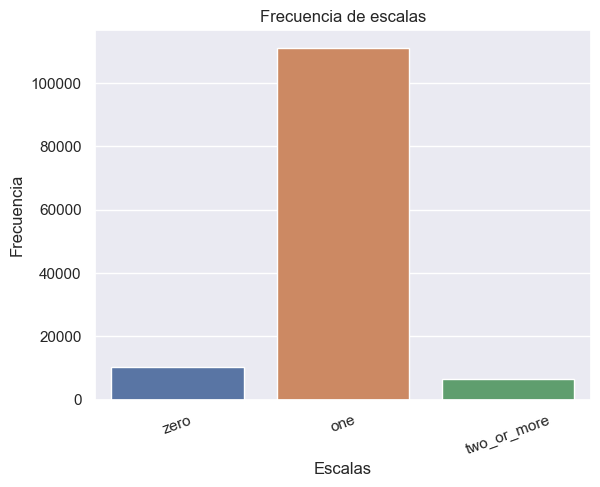

In [55]:
sns.countplot(data=data, x='stops')
plt.xlabel('Escalas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de escalas')
plt.xticks(rotation=20)
plt.show()

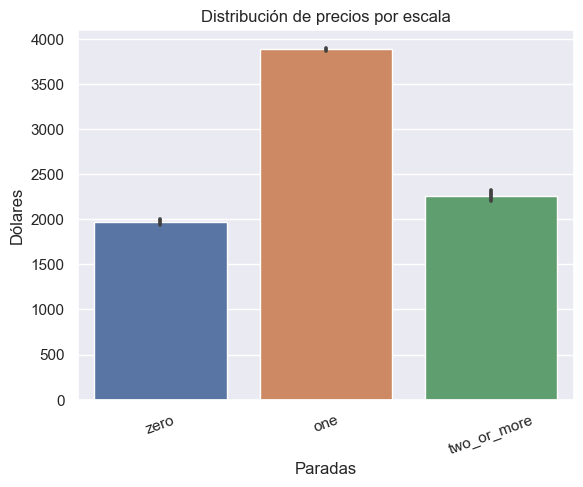

In [56]:
sns.barplot(data=data, x='stops', y='dolares')
plt.xlabel('Paradas')
plt.ylabel('Dólares')
plt.title('Distribución de precios por escala')
plt.xticks(rotation=20)
plt.show()

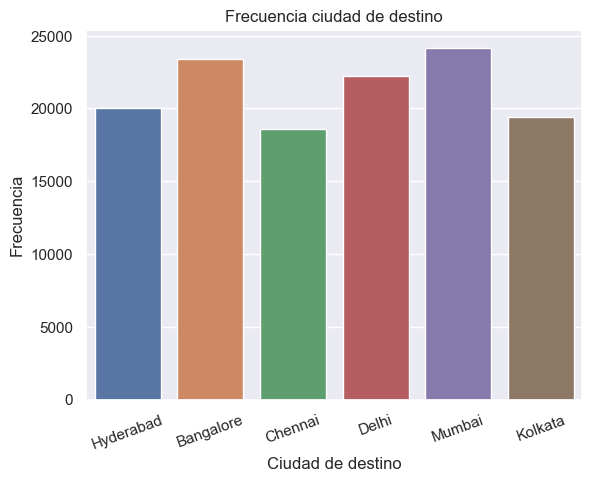

In [57]:
sns.countplot(data=data, x='destination_city')
plt.xlabel('Ciudad de destino')
plt.ylabel('Frecuencia')
plt.title('Frecuencia ciudad de destino')
plt.xticks(rotation=20)
plt.show()

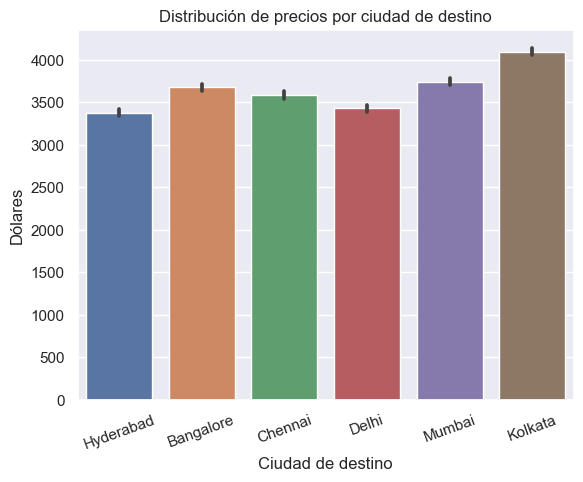

In [58]:
sns.barplot(data=data, x='destination_city', y='dolares')
plt.xlabel('Ciudad de destino')
plt.ylabel('Dólares')
plt.title('Distribución de precios por ciudad de destino')
plt.xticks(rotation=20)
plt.show()

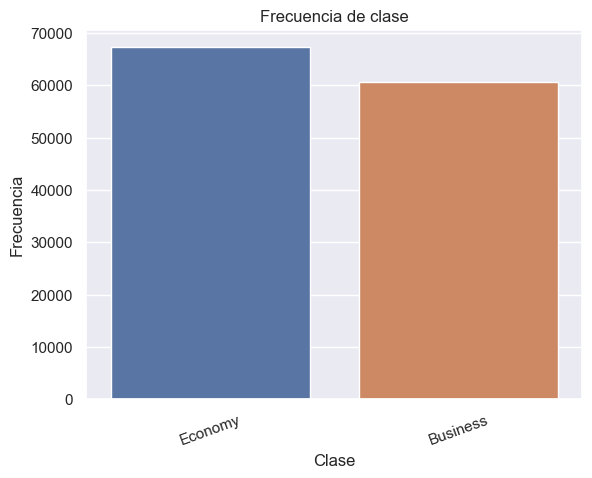

In [59]:
sns.countplot(data=data, x='class')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de clase')
plt.xticks(rotation=20)
plt.show()

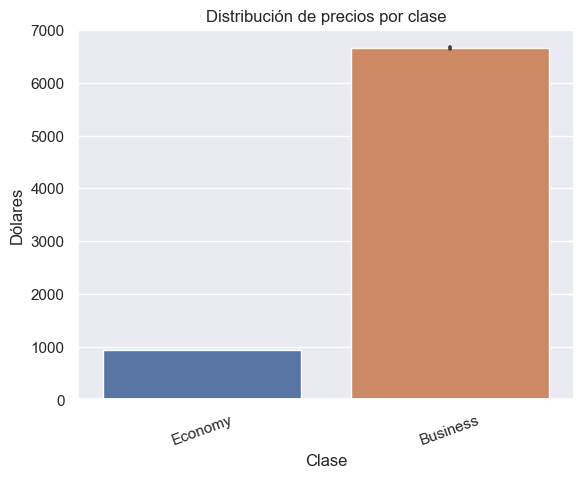

In [60]:
sns.barplot(data=data, x='class', y='dolares')
plt.xlabel('Clase')
plt.ylabel('Dólares')
plt.title('Distribución de precios por clase')
plt.xticks(rotation=20)
plt.show()

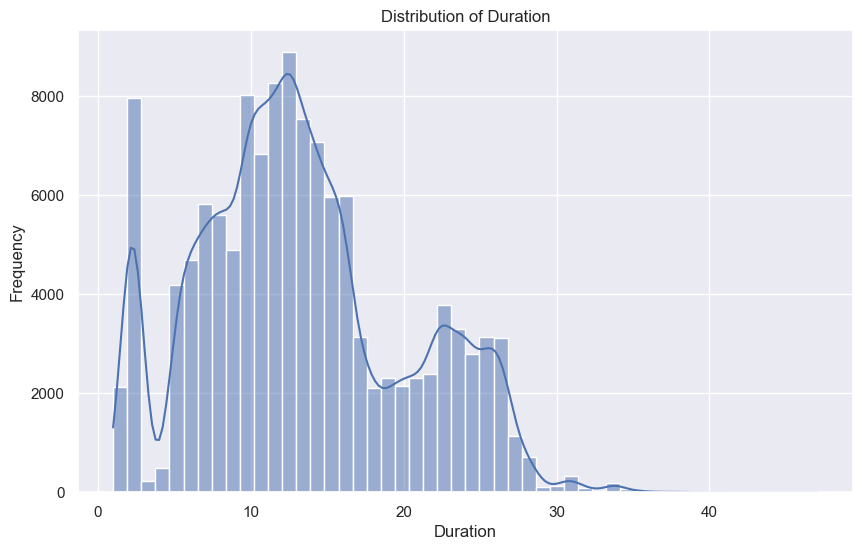

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='duration', bins=50, kde=True)  # Ajusta el número de bins según tus necesidades
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Duration')
plt.show()

In [62]:
#precio vs dias

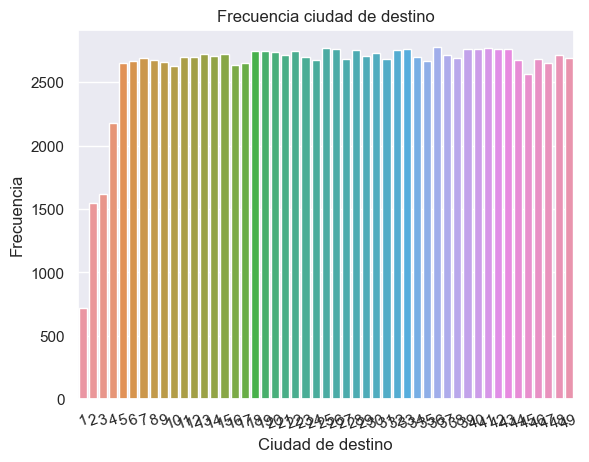

In [63]:
sns.countplot(data=data, x='days_left')
plt.xlabel('Ciudad de destino')
plt.ylabel('Frecuencia')
plt.title('Frecuencia ciudad de destino')
plt.xticks(rotation=20)
plt.show()

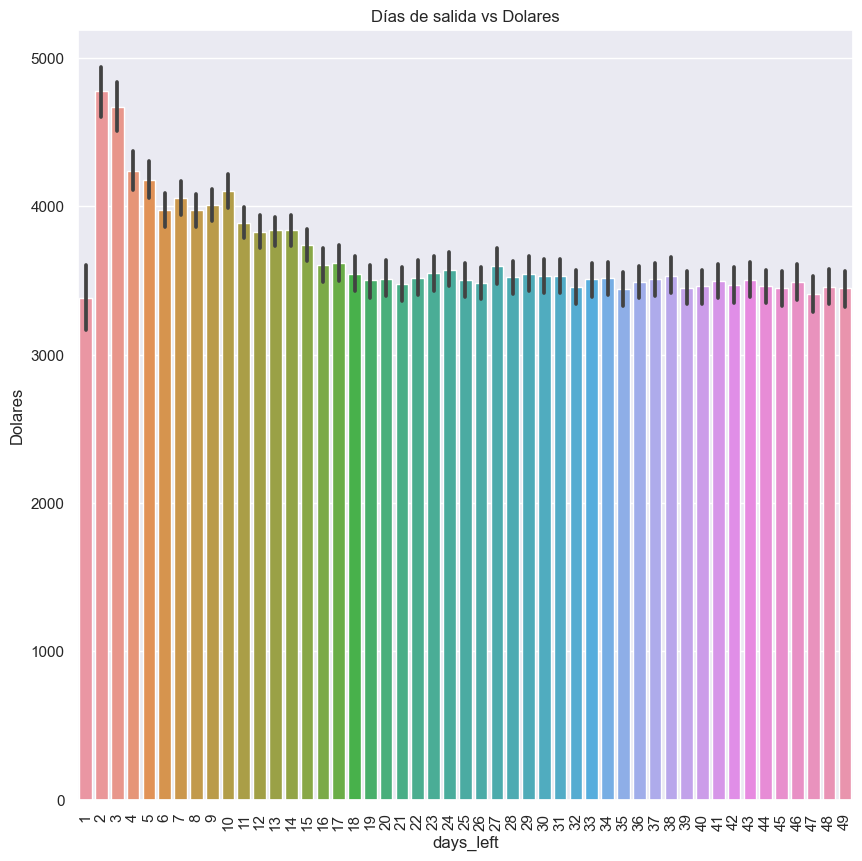

In [64]:
df=sns.set(font_scale=1)
df=plt.figure(figsize=(10, 10)) 
df=sns.barplot(data=data, x='days_left', y='dolares')
df=plt.xlabel('days_left')
df=plt.ylabel('Dolares')
df=plt.title('Días de salida vs Dolares')
df=plt.xticks(rotation=90)
df=plt.show()